<a href="https://colab.research.google.com/github/bgambaroni/AnalisedeAudio/blob/main/MFCCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload do seu arquivo de áudio:


Saving Verrina - 7 anos mix2026 V1.wav to Verrina - 7 anos mix2026 V1.wav
Áudio carregado: Verrina - 7 anos mix2026 V1.wav
Duração: 191.06 segundos
Taxa de amostragem: 44100 Hz

=== Resultado da extração ===
Formato da matriz de MFCCs: (13, 16457)
→ 13 coeficientes por frame
→ 16457 frames temporais (cada frame ≈ 20-30ms)


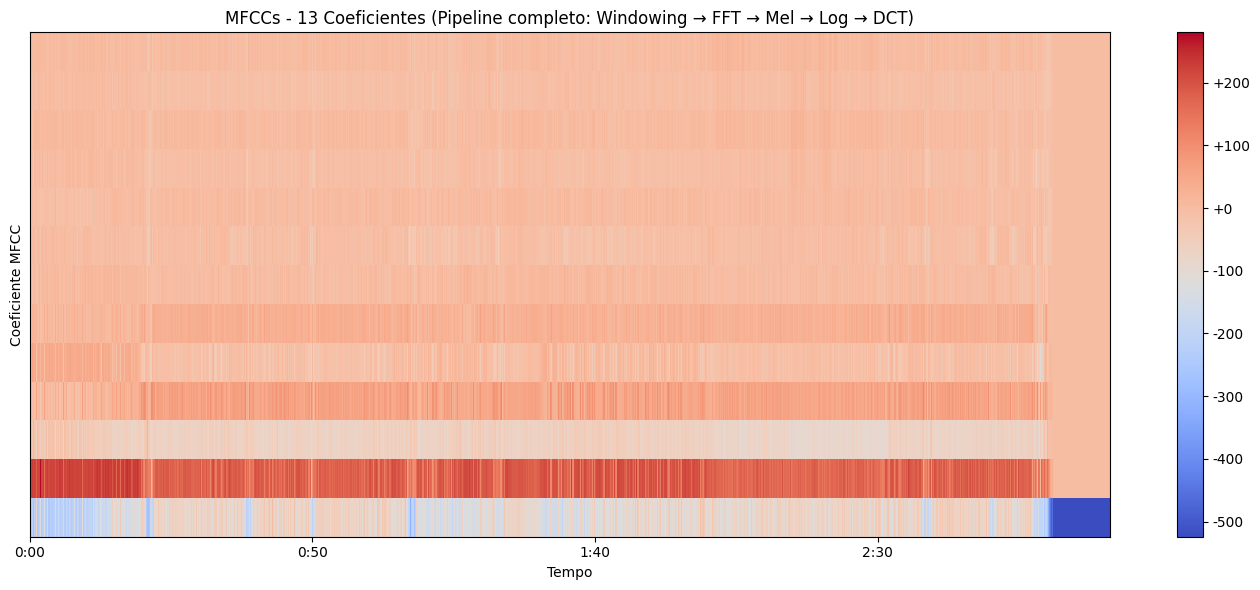


Média de cada coeficiente MFCC (valores típicos usados em modelos):
MFCC  1: -123.83
MFCC  2: +168.10
MFCC  3: -58.69
MFCC  4: +50.19
MFCC  5: -2.98
MFCC  6: +26.44
MFCC  7: +1.37
MFCC  8: -6.63
MFCC  9: +0.92
MFCC 10: -4.81
MFCC 11: +3.66
MFCC 12: -5.84
MFCC 13: +1.80


In [1]:
# ===============================================
# Pipeline de Extração de MFCCs com Librosa
# Exploração passo a passo de como o áudio vira features
# ===============================================

# 1. Instalar e importar bibliotecas (rode só na primeira vez)
!pip install librosa matplotlib numpy

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 2. Carregar o áudio (faça upload do seu arquivo .wav ou .mp3 no Colab)
from google.colab import files

print("Faça upload do seu arquivo de áudio:")
uploaded = files.upload()  # Aqui você seleciona o arquivo no seu computador

# Pega o nome do arquivo que você subiu
audio_file = list(uploaded.keys())[0]

# Carrega o áudio
y, sr = librosa.load(audio_file, sr=None)  # sr=None mantém a taxa original
print(f"Áudio carregado: {audio_file}")
print(f"Duração: {librosa.get_duration(y=y, sr=sr):.2f} segundos")
print(f"Taxa de amostragem: {sr} Hz")

# 3. Extração dos MFCCs (o pipeline completo acontece aqui dentro)
#    Librosa faz automaticamente:
#    - Windowing (janelas de ~20-40ms)
#    - STFT → FFT
#    - Mel filterbank
#    - Log scale
#    - DCT → coeficientes MFCC
n_mfcc = 13  # Número clássico de coeficientes (pode mudar para 20, 40 etc.)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# 4. Análise do resultado
print("\n=== Resultado da extração ===")
print(f"Formato da matriz de MFCCs: {mfccs.shape}")
print(f"→ {mfccs.shape[0]} coeficientes por frame")
print(f"→ {mfccs.shape[1]} frames temporais (cada frame ≈ 20-30ms)")

# 5. Visualização dos MFCCs (heatmap)
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(format='%+2.0f')
plt.title(f'MFCCs - {n_mfcc} Coeficientes (Pipeline completo: Windowing → FFT → Mel → Log → DCT)')
plt.xlabel('Tempo')
plt.ylabel('Coeficiente MFCC')
plt.tight_layout()
plt.show()

# 6. Opcional: ver os valores médios de cada coeficiente (útil para classificação)
mfccs_mean = np.mean(mfccs, axis=1)
print("\nMédia de cada coeficiente MFCC (valores típicos usados em modelos):")
for i, val in enumerate(mfccs_mean):
    print(f"MFCC {i+1:2d}: {val:+.2f}")